## Outlier Detection
**Author**: Jamie Scheper </br>
**Date**: 16-01-2024

This is a simple script to detect outliers and was used during the EDA process.

The function needs:
* a (raw) counts dataset
* to know whether to normalize or not (preferable!)

It then runs the model (`IsolationForest`), detects outliers, and dimension reduction by PCA follows to display its findings on a simple plot with outliers depicted in red.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
 
def detect_outliers(file, norm=True):
    """
    A simple function to detect outliers using the IsolationForest function.
    In addition, uses PCA to display findings.

    :param file: file with RNA-Seq count data
    :param norm: whether to use a standard scaler or not (standard = True)
    :return a list with sample identifiers which are labeled as outliers 
    """
    # Remove the first column (a redundant column named 'Unnamed')
    inputfile = pd.read_csv(file, index_col='gene').iloc[:, 1:]

    if norm:
        # Use + 0.01 to eliminate zero valuations and transpose (samples are rows now)
        inputfile_t = np.log2(inputfile + 0.01).transpose()
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(inputfile_t)
    if not norm:
        inputfile_t = inputfile.transpose()
        scaled_data = inputfile_t
   
    clf = IsolationForest(n_estimators=100)
    outliers = clf.fit_predict(scaled_data)
    inputfile_t['is_outlier'] = outliers

    # Perform PCA for plotting
    pca = PCA()
    pcs = pca.fit_transform(scaled_data)

    pc_df = pd.DataFrame(data=pcs[:, :2], columns=['PC1', 'PC2'])
    pc_df['is_outlier'] = outliers
    # Outliers are displayed as '-1'; change to 'outlier'
    pc_df['is_outlier'] = pc_df['is_outlier'].apply(lambda x: 'outlier' if x == -1 else 'inliner')

    sns.scatterplot(data =pc_df, x='PC1', y='PC2', hue='is_outlier', 
                    palette={'outlier':'red', 'inliner':'blue'}, style = 'is_outlier')

    plt.title("Outlier detection using IsolationForest")
    plt.show()

    # Only use the index (sample) as a return
    outlier_samples = inputfile_t[inputfile_t['is_outlier'] == -1].index.tolist()

    return outlier_samples

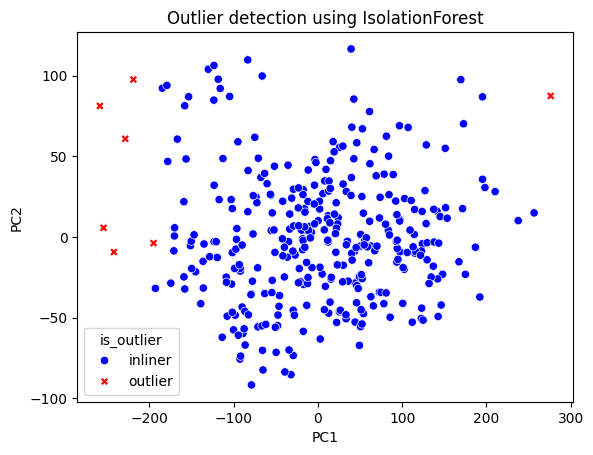

['sepcol002',
 'sepcol007',
 'sepcol014',
 'sepcol061',
 'sepcol065',
 'sepwes014',
 'sepcv010T0']

In [173]:
# Using raw count data
detect_outliers("sepsis_raw_counts.csv", norm=True)

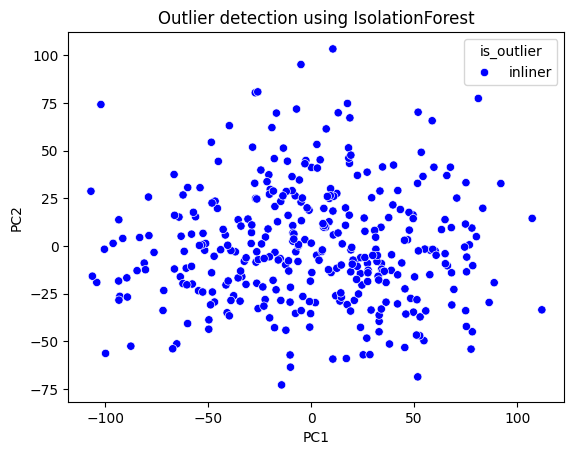

[]

In [144]:
# Using VST-normalized, batch corrected, low-expressed gene-filtered count data
detect_outliers("sepsis_normalized_counts.csv", norm=False)